In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tqdm import tqdm_notebook as tqdm
from tensorflow.keras import backend as K


import sklearn.metrics as metrics

import numpy as np

import matplotlib.pyplot as plt

###Tensorflow session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [2]:
import gzip
import sys
import pickle
f = gzip.open('mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

(X_train, y_train), (X_test, y_test) = data

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [4]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
inputs = layers.Input(shape=(28,28,1))
x = layers.Conv2D(32,(3,3))(inputs)
x = layers.Conv2D(32,(3,3))(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64,(3,3))(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128,(3,3))(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='elu')(x)
x = layers.Dense(10, activation='softmax')(x)
model = keras.models.Model(inputs, x)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         7385

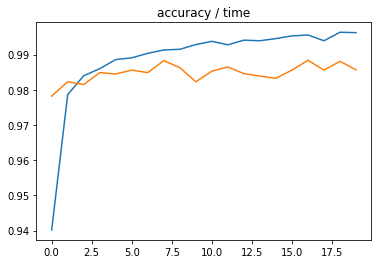

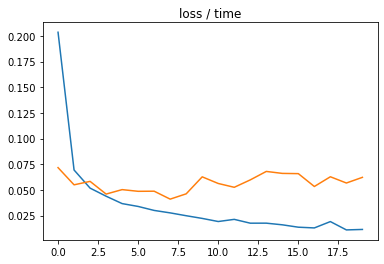

In [8]:
plt.title("accuracy / time")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()
plt.title("loss / time")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [9]:
model.save('mnist_model.h5')